# Probabilistic Programming and Bayes' Rule - An intro.

Index:
* Probabilistic programming in a nutshell
* Bayes' Rule
* Mandatory coin example

# Probabilistic programming (PP) in a nutshell

* PP is not a specific programming language
* PP is a set of *computational methods* for *statistical modeling*
* PP exploits the power of computers and the automation/flexibility of programming languages to perform *statistical inference*

## What is ~~statistical~~ Bayesian inference?
* Statistical inference is the process of inferring properties (i.e. parameters) of an underlying probability distribution.
* Bayesian Machine Learning (requires statistical inference techniques) vs. Deep Learning (requires gradients).
* Both techniques can find the optimal values of the parameters of the model.
* Bayesian Machine Learning naturally computes confidence intervals for each parameter.

The popularity of deep learning is due to (a) its effectiveness, (b) the existence of **backpropagation**, a convenient algorithm to quickly compute the gradients. Probabilistic programming aims to provide the same convenient set of tools to Bayesian machine learning.

**What you need for Bayesian inference**:
* Bayes' Rule
* beliefs
* a (statistical) model/system

# Bayes' Rule
All quantities are treated as **random variables** with an associated probability distribution, i.e. a function that assigns a (relative) probability to each possible value the random variable can take.


**Bayes' Rule provides a way to update our prior beliefs once we observe some evidence (i.e. gather some data) related to it.** That is, you think there is a 1% probability of getting the coronavirus but then you observe that 9 of your 10 friends have it. Do you still think you have a 1% chance of getting the coronavirus?


# $P(\theta|D) = \frac{P(D|\theta)\cdot P(\theta)}{P(D)} \propto P(D|\theta)\cdot P(\theta)$


* $\theta$: vector of parameters,
* $D$ vector of observations,
* $P(\theta)$: *prior* probability distribution,
* $P(D|\theta)$: *likelihood*,
* $P(D)$: *marginal likelihood* (normalizing constant)
* $P(\theta|D)$: *posterior* probability distriburion.

Let's see in the following section what each of these terms means.

# Mandatory coin flip example

A magician gave you a coin and told you it's a magic coin that increases your chances of winning a con-flip bet if you always bet on heads. You may ask yourself:



> *What is the probability of getting a head on a given flip with this coin?*



## (a) The likelihood: describe coin flipping as a statistical model.
A statistical model is just any model $y=g(x)$ for which at least one of its variables is random.

For example, 
* $y = ax + b$, with $a,b$ constants, is a deterministic model.
* $y = ax + b + \epsilon$, with $\epsilon\sim\mathcal{N}(0, \sigma^2)$ is a stochastic model.




The statistical model should describe the process that generates the data (i.e. the coin flip in this case).

We can describe the probability of getting heads as $P(D=head|\theta) = \theta$, and the probability of getting tail as $P(D=tail|\theta) = 1-\theta$.

In compact form:

$$P(D=d|\theta) = \theta^{\#heads}(1-\theta)^{\#tails},$$
<br>
this is the binomial distribution. It represents the probability distribution for multiple independent events with only two possible outcomes.

**Note** that the likelihood depends on the $\#heads$ and $\#tails$, i.e. from the outcome of our data gathering procedure. In this sense, the likelihood integrates observations in our model.

## (b) The prior: your initial belief.
If it was a normal coin we would set the probability of getting a head on a given flip to $\theta=0.5$. However, the magician told us the coin is magic, so we think $\theta=0.6$ is the likeliest value. Note that we think that also other values of $\theta$ are possible. We treat $\theta$ as a random variable and describe it with a pdf that closely follows our belief.

**Bottomline**: the prior represents our belief on the values that $\theta$ may take. It is completely subjective.

Let's model our belief as a Beta distribution with 0.6 as likeliest value.

Formally, we write $\theta \sim \text{Beta}(\alpha, \beta)$, with $P(\theta) = \text{constant}\cdot\theta^{\alpha-1}(1-\theta)^{\beta-1}$.

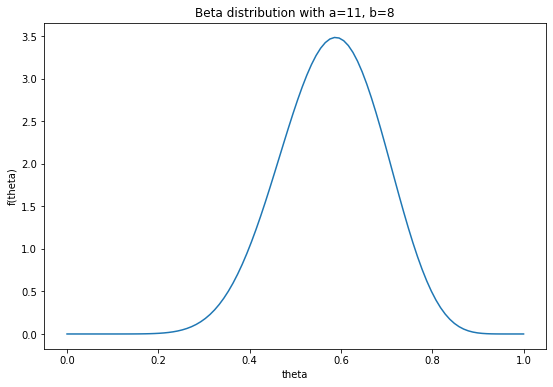

In [ ]:
# Let's model our belief as a Beta distribution with 0.6 as likeliest value.
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a = 11 
b = 8
x = np.linspace(1e-5, 1-1e-5, 100)

plt.figure(figsize=(9,6))
plt.plot(x, stats.beta.pdf(x, a, b))
plt.xlabel('theta')
plt.ylabel('f(theta)')
plt.title(f'Beta distribution with a={a}, b={b}')
plt.show()

## (c) The posterior: your updated belief after collecting some data.

> *Suppose you flip a coin 100 times and observe 30 heads. Now what is your updated probability of getting a head on the next flip?*

Compute the posterior and find it out.



### (c.1) Analytical solution

The posterior is: 
$P(\theta|D) \propto \theta^3(1-\theta)^7\cdot\text{constant}\cdot\theta^{10}(1-\theta)^{7}$

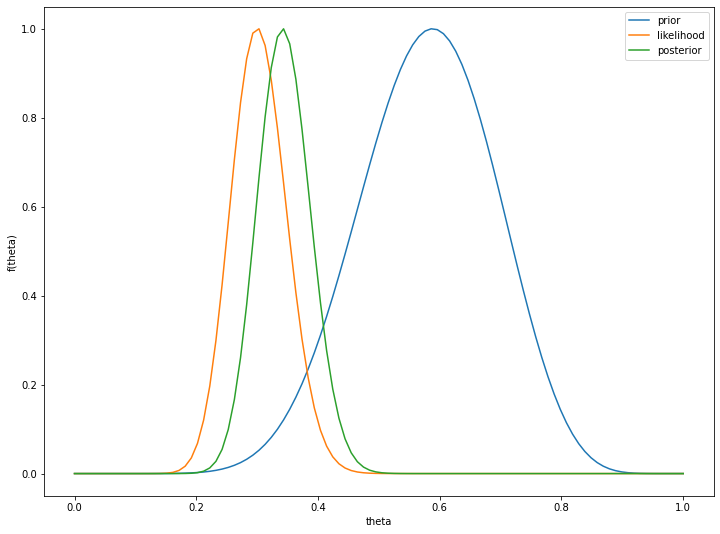

In [ ]:
# Parameters of beta distribution
a = 11; b = 8

# Parameters of binomial distribution
trials=100; heads=30

# theta
t = np.linspace(1e-5, 1-1e-5, 100)
prior = stats.beta.pdf(t, a, b)
lkh = stats.binom.pmf(heads, trials, t)
posterior = lkh * prior

plt.figure(figsize=(12,9))
plt.plot(t, prior/max(prior), label='prior')
plt.plot(t, lkh/max(lkh), label='likelihood')
plt.plot(t, posterior/max(posterior), label='posterior')
plt.xlabel('theta')
plt.ylabel('f(theta)')
plt.legend()
plt.show()

**Bottomline** The posterior is a compromise between the prior and likelihood. Specifically:
* When there are less data points, the distribution is skewed towards the prior distribution.
* When there are more data points, the distribution is skewed towards the likelihood distribution.


### (c.2) Sampling from the posterior

What we have derived above is the *unnormalized* posterior, i.e. the numerator of Bayes' rule. 

The denominator is called *marginal likelihood* and can be written as:

$P(D) = \int_{\theta}P(D|\theta)P(\theta)d\theta$.

The marginal likelihood makes the integral of the posterior sum to $1$, which is a necessary condition for it to be a proper pdf.



In practice, analytically computing the posterior is not always possible, especially in presence of complex models with many parameters (it's a numerical integration exercise!). Thankfully, there are some techniques that allow to sample from the posterior distribution and approximate it.

The most famous of which is the **Markov-Chain Monte Carlo** sampling technique.

In [ ]:
import pymc3 as pm

# Data gathered
data = [1,1,1,0,0,0,0,0,0,0]*10

coin_model = pm.Model()

with coin_model:

  # Prior distribution
  theta = pm.Beta(name='theta', alpha=11, beta=8)

  # Likelihood
  lkh = pm.Bernoulli(name="n", p=theta, observed=data)

  # draw 1000 samples from posterior
  trace = pm.sample(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


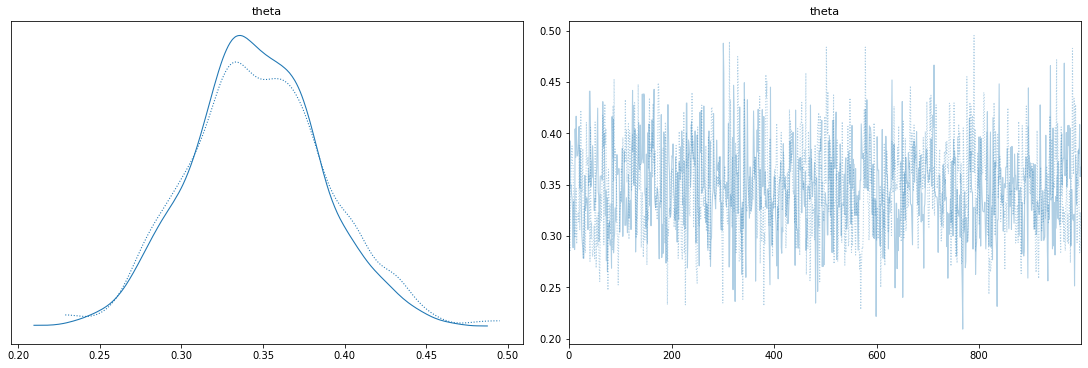

In [ ]:
pm.traceplot(trace, figsize=(15,5));

### (c.3) Variational inference

In case $\theta$ is very high-dimensional or getting observations is very expensive $\rightarrow$ use **variational inference**.

Variational inference transforms the stochastic problem into a deterministic one and uses gradient-based techniques to estimate the optimial value of $\theta$. A byproduct of this is that the form of the loss function and regularization are a natural consequence of the formulation of the problem from the Bayesian point of view.